| Variable Name       | Role    | Type        | Description                                               | Units   | Missing Values |
|---------------------|---------|-------------|-----------------------------------------------------------|---------|----------------|
| holiday             | Feature | Categorical | US National holidays plus regional holiday, Minnesota State Fair |         | no             |
| temp                | Feature | Continuous  | Average temp in kelvin                                     | Kelvin  | no             |
| rain_1h             | Feature | Continuous  | Amount in mm of rain that occurred in the hour             | mm      | no             |
| snow_1h             | Feature | Continuous  | Amount in mm of snow that occurred in the hour             | mm      | no             |
| clouds_all          | Feature | Integer     | Percentage of cloud cover                                  | %       | no             |
| weather_main        | Feature | Categorical | Short textual description of the current weather           |         | no             |
| weather_description | Feature | Categorical | Longer textual description of the current weather          |         | no             |
| date_time           | Feature | Date        | Hour of the data collected in local CST time               |         | no             |
| traffic_volume      | Target  | Integer     | Hourly I-94 ATR 301 reported westbound traffic volume       |         | no             |'

In [4]:
import pandas as pd

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


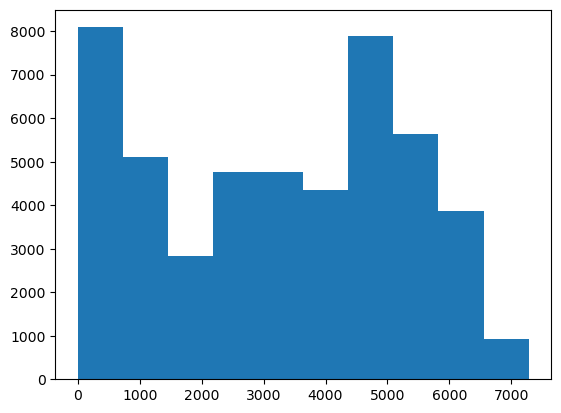

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['traffic_volume'])
plt.show()

<Axes: >

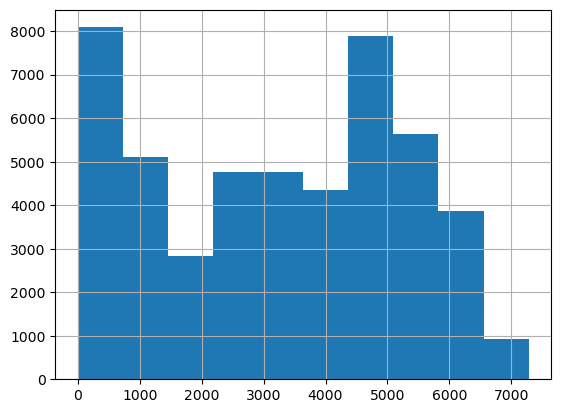

In [9]:
df.traffic_volume.hist()

In [10]:
df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
df.date_time=pd.to_datetime(df.date_time)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [22]:
df['hour']=df.date_time.dt.hour

In [26]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [57]:
df_day=df[(df['hour']>=6) & (df['hour']<19)]
df_night=df[(df['hour']<6) | (df['hour']>=19)]

In [58]:
len(df_night)

22240

In [59]:
len(df[~((df['hour']>=6) & (df['hour']<19))])

22240

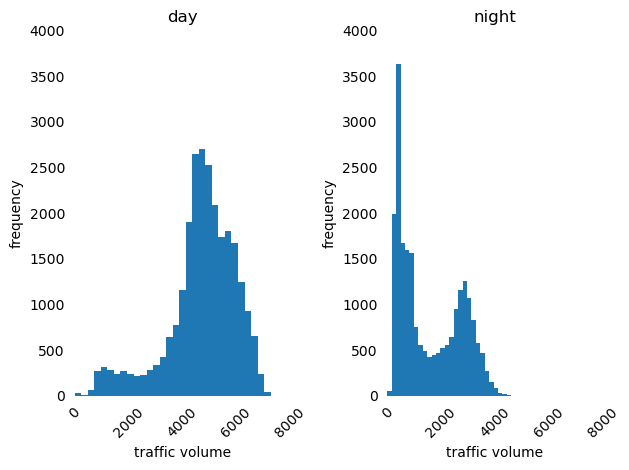

In [84]:
fig, axes=plt.subplots( 1, 2)
ax1=axes[0]
ax2=axes[1]
df_day.traffic_volume.hist(ax=ax1, bins=30)
ax1.set_title("day")

df_night.traffic_volume.hist(ax=ax2, bins=30)
ax2.set_title("night")

for ax in axes:
    ax.set_xlabel("traffic volume")
    ax.set_ylabel("frequency")
    ax.set_xlim(0, 7500)
    ax.set_ylim(0, 4000)
    # remove grid
    ax.grid(False)
    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # remove ticks
    ax.tick_params(bottom=False, left=False)
    # set custom y_ticks: 0, 2000, 4000, 8000
    ax.set_xticks([0, 2000, 4000, 6000, 8000])
    # rotate x_ticks
    ax.set_xticklabels([0, 2000, 4000, 6000, 8000], rotation=45)


plt.tight_layout()
plt.show()

In [92]:
df_day.loc[:, 'month'] = df_day['date_time'].dt.month.copy()

by_month = df_day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']


/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_2179/944021784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day.loc[:, 'month'] = df_day['date_time'].dt.month.copy()


month
1     4454.437905
2     4668.720893
3     4808.595238
4     4855.753996
5     4864.847373
6     4844.947215
7     4548.161464
8     4880.405840
9     4822.254195
10    4885.176377
11    4655.133030
12    4315.102345
Name: traffic_volume, dtype: float64

<Axes: xlabel='month'>

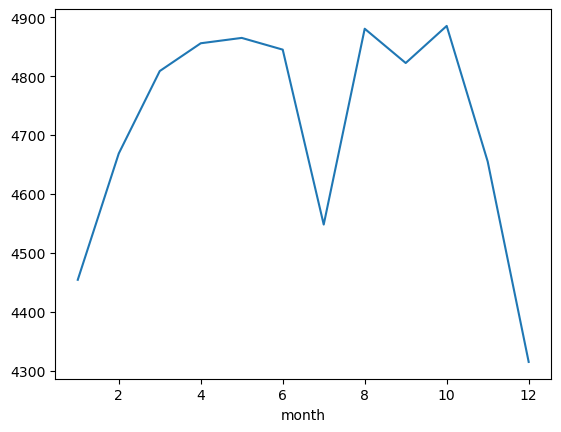

In [96]:
by_month['traffic_volume'].plot()
#plt.ylim(0, 5000)

/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_2179/1908266298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['dayofweek'] = df_day['date_time'].dt.dayofweek


<Axes: xlabel='dayofweek'>

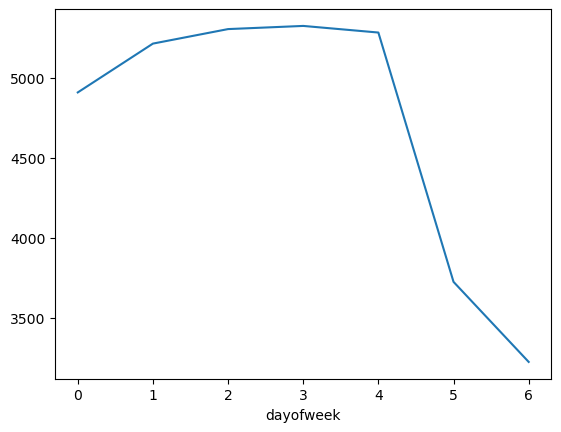

In [98]:
df_day['dayofweek'] = df_day['date_time'].dt.dayofweek
by_dayofweek = df_day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot()  # 0 is Monday, 6 is Sunday

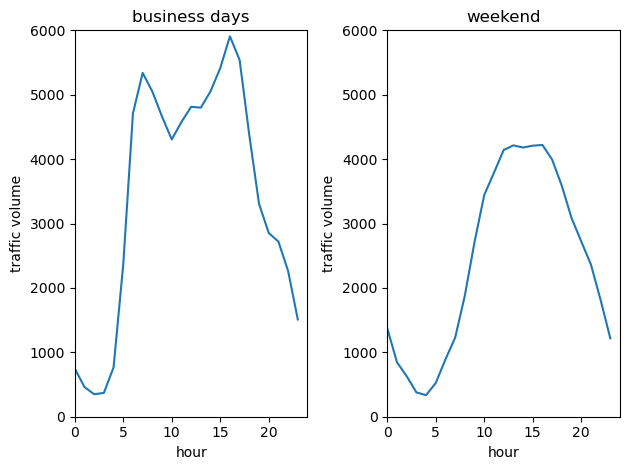

In [111]:
df_business_days = df[df['date_time'].dt.dayofweek<=5]
df_weekend=df[df['date_time'].dt.dayofweek>5]

df_business_days_time=df_business_days.groupby("hour")["traffic_volume"].mean()
df_weekend_days_time=df_weekend.groupby("hour")["traffic_volume"].mean()

fig, axes=plt.subplots(1,2)
ax1=axes[0]
ax2=axes[1]
ax1.plot(df_business_days_time)
ax1.set_title("business days")
ax2.plot(df_weekend_days_time)
ax2.set_title("weekend")

for ax in axes:
    ax.set_xlim(0, 24)
    ax.set_ylim(0, 6000)
    ax.set_xlabel("hour")
    ax.set_ylabel("traffic volume")

plt.tight_layout()
plt.show()

In [104]:
df_business_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48173,None,280.68,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 19:00:00,3818,19
48174,None,280.55,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 20:00:00,3338,20
48175,None,280.40,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 21:00:00,2950,21
48176,None,280.54,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 22:00:00,2607,22


In [113]:
df.corr().traffic_volume

/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_2179/3191188180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().traffic_volume


temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
hour              0.352401
Name: traffic_volume, dtype: float64

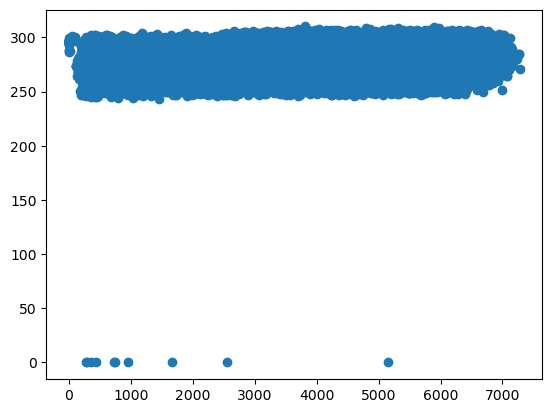

In [114]:
plt.scatter(df['traffic_volume'], df['temp'])

<BarContainer object of 48204 artists>

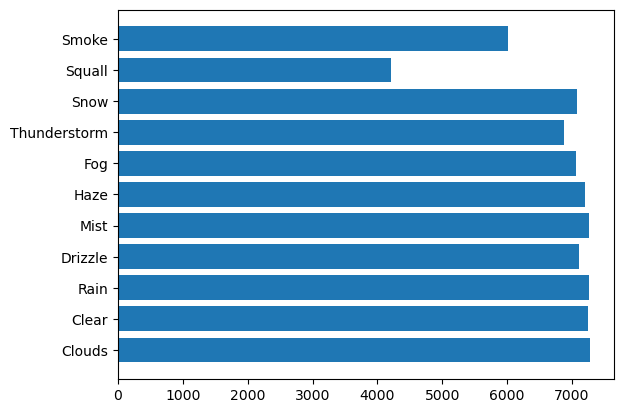

In [115]:
plt.barh(df['weather_main'], df['traffic_volume'])

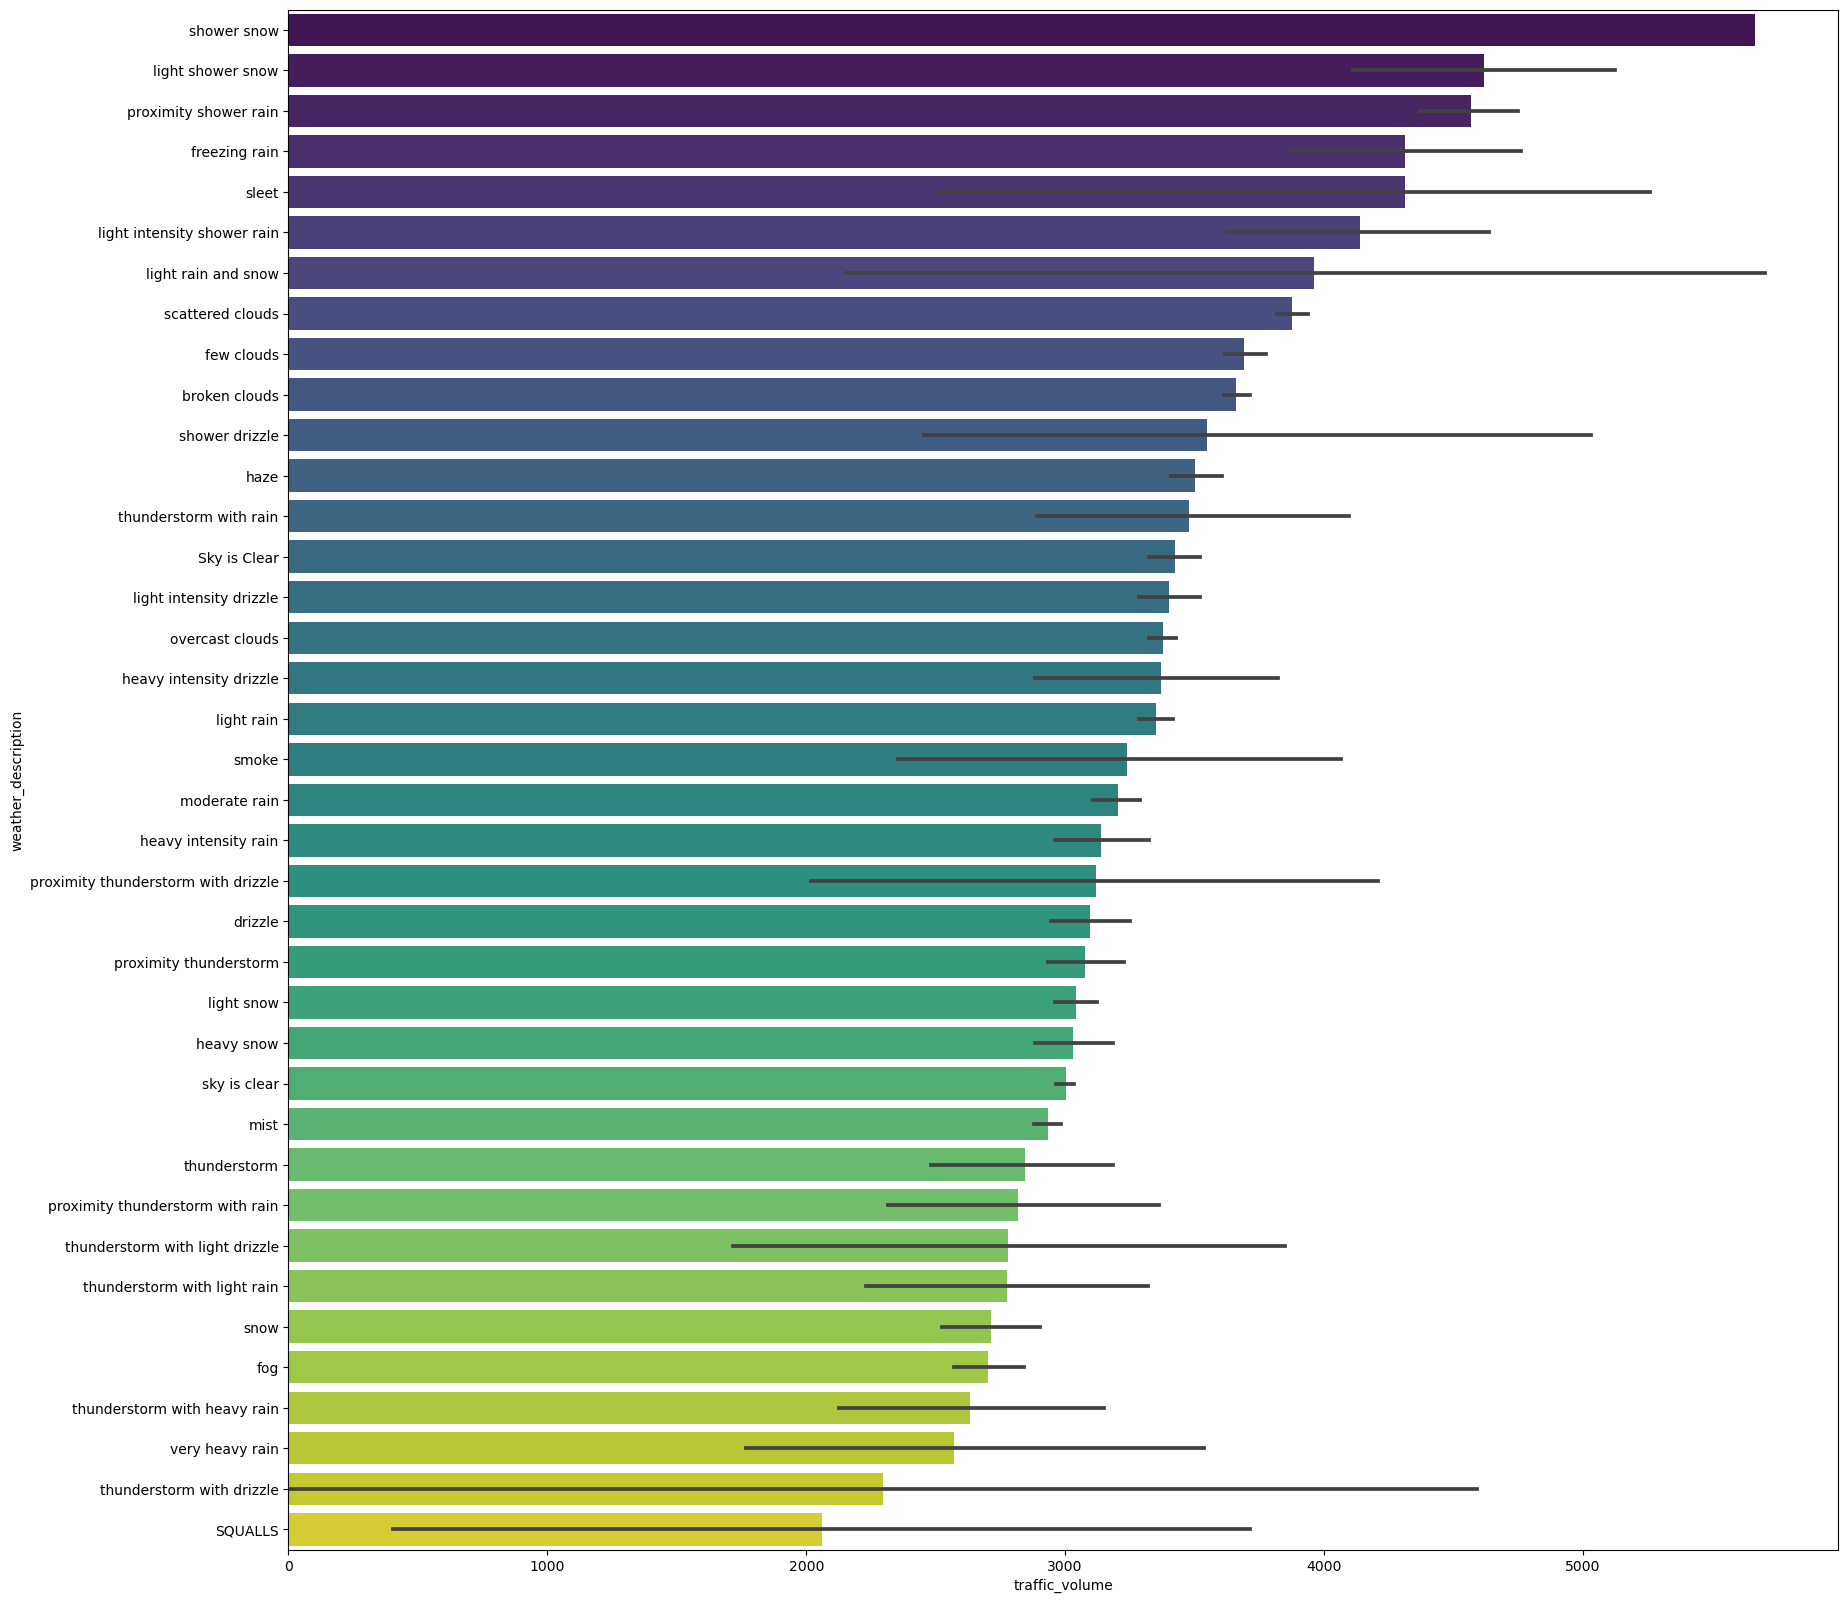

In [126]:
import seaborn as sns




plt.figure(figsize=(20,20))
sns.barplot(data=df, x="traffic_volume", y="weather_description", orient="h", palette="viridis", order=df.groupby("weather_description")["traffic_volume"].mean().sort_values(ascending=False).index)
plt.show()

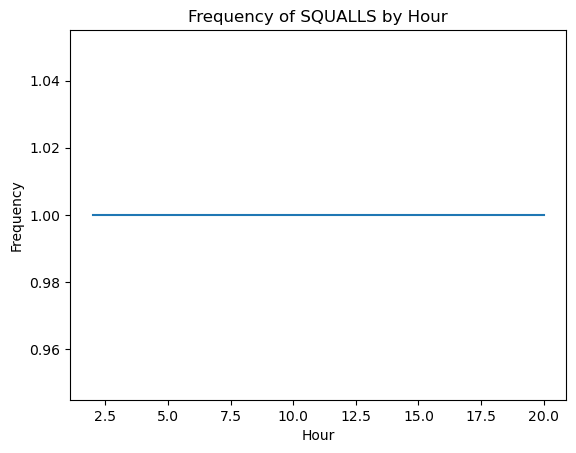

In [127]:
# reduce df to SQUALLS in weather description
df_squalls = df[df['weather_description'] == 'SQUALLS']

# group by time and count frequency
squalls_by_hour = df_squalls.groupby('hour').count()

# plot
squalls_by_hour['weather_description'].plot()
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of SQUALLS by Hour')
plt.show()

In [129]:
len(df)

48204